# detrending time series data that has seasonality

In the notebook below I load the data from a .pkl and reduce the original dataframe `df` to a simpler dataframe `df_spring`

Your task is to remove the trend from values in the `EAST` column in `df_spring`. The trend is the upward linear slope of data. After removing the trend, you should end up with flat bumpy data. 

After removing the trend, plot the de-trended data and place the revised values in `df_spring_detrended` with columns `HOUR_End` and `EAST power detrended`

### context for task

Q: Why is removing the trend useful?<BR>
Answer: because follow-on tasks like determining periodicity and noise depend on the data not having an upward or downward slope.
    
Q: How should we remove the trend?<BR>
Answer: First, determine what the trend is. This means fitting the data with a line of best fit. Key phrases for Googling: linear regression, fit a line to data<BR>
Second, once you know what the linear fit is, you'll need to subtract something from each data point such that the slope is flat (slope=0) but the bumps are still present. 

### context for data

"Electric Reliability Council of Texas (ERCOT) manages the flow of electric power to more than 25 million Texas customers -- representing about 90 percent of the state’s electric load." (<a href="http://www.ercot.com/about">source</a>)

Example report: http://www.ercot.com/content/wcm/lists/143010/2018_Long-Term_Hourly_Peak_Demand_and_Energy_Forecast_Final.pdf

Data source:<BR>
http://www.ercot.com/gridinfo/load/load_hist/

In [1]:
import pandas
print('pandas',pandas.__version__)
import numpy
print('numpy',numpy.__version__)
import time
import matplotlib.pyplot as plt

pandas 0.23.4
numpy 1.13.3


In [2]:
start_time=time.time()
df=pandas.read_pickle('power_data.pkl')
df.reset_index(inplace=True)
print(df.shape)
print('elapsed:',time.time()-start_time,'seconds')

(113952, 11)
elapsed: 0.2406315803527832 seconds


In [3]:
df.head()

,index,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,0,2006-01-01 01:00:00.003,7623.394894,788.305875,1026.559049,777.157535,7549.809438,1852.416802,3797.223989,639.553370,24054.420954
1,1,2006-01-01 01:59:59.997,7437.102525,779.587442,1024.320168,752.171350,7291.494704,1770.283786,3637.505535,628.083900,23320.549410
2,2,2006-01-01 03:00:00.000,7151.481479,767.310985,1011.297406,725.028737,7012.269706,1676.891230,3482.207530,614.014931,22440.502004
3,3,2006-01-01 04:00:00.003,6957.302786,774.671447,1004.026250,711.968331,6896.466664,1609.080496,3363.417807,611.227308,21928.161089
4,4,2006-01-01 04:59:59.997,6861.596790,772.916673,1005.141879,708.933070,6810.395549,1595.417621,3303.547499,613.746434,21671.695516


There are 9 columns, one per region of monitoring

<img src="http://www.ercot.com/content/wcm/landing_pages/88828/Weather_Map.png" width="300" align='left'>

# visualize data

use plot_date to see all the data

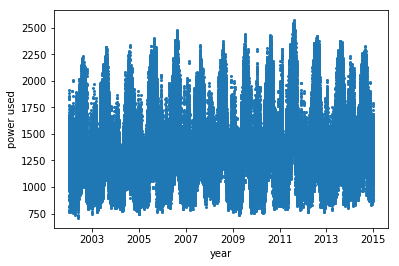

In [4]:
plt.plot_date(x=df['Hour_End'],y=df['EAST'],markersize=2);
plt.ylabel('power used');
plt.xlabel('year');

To get a sense of the data contents, zoom in on the first few data points

The sampling is once per hour, so to get 5 days we an look at the first 24*5 data points

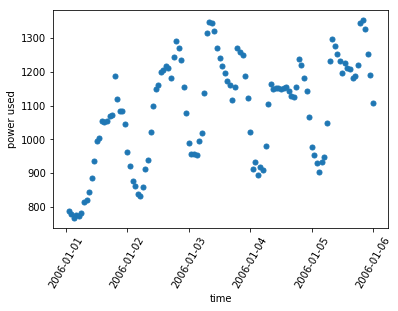

In [5]:
max_ct = 24*5
plt.plot_date(x=df['Hour_End'][0:max_ct],y=df['EAST'][0:max_ct],markersize=5);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

spring to summer

In [6]:
start_time = 4*30*24
end_time = 4*30*24 + start_time

df_spring = pandas.concat([df['Hour_End'][start_time:end_time],  df['EAST'][start_time:end_time]], axis=1)
df_spring.reset_index(inplace=True)
df_spring.drop('index', axis=1, inplace=True)
df_spring.head()

,Hour_End,EAST
0,2006-05-01 01:59:59.997,908.838060
1,2006-05-01 03:00:00.000,847.845551
2,2006-05-01 04:00:00.003,837.892177
3,2006-05-01 04:59:59.997,851.228162
4,2006-05-01 06:00:00.000,899.245973


In [7]:
df_spring.dtypes

Hour_End    datetime64[ns]
EAST               float64
dtype: object

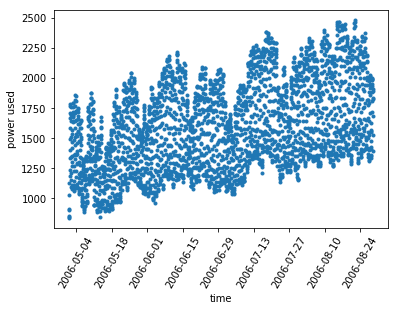

In [8]:
plt.plot_date(x=df_spring['Hour_End'],y=df_spring['EAST'],markersize=3);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

## A SOLUTION

https://machinelearningmastery.com/time-series-trends-in-python/

In [9]:
from sklearn.linear_model import LinearRegression

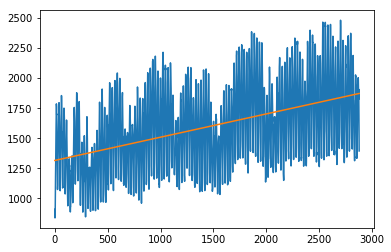

In [10]:
series = df_spring['EAST']
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))

y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()

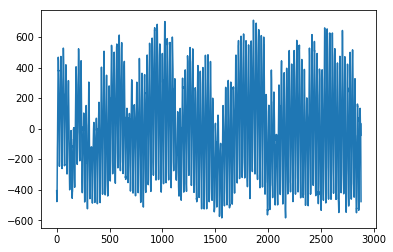

In [11]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

In [12]:
df_spring_detrended = pandas.DataFrame(
    {'Hour_End': df_spring['Hour_End'].values,
     'EAST power detrended': detrended})

In [13]:
df_spring_detrended.head()

,Hour_End,EAST power detrended
0,2006-05-01 01:59:59.997,-406.579046
1,2006-05-01 03:00:00.000,-467.764914
2,2006-05-01 04:00:00.003,-477.911647
3,2006-05-01 04:59:59.997,-464.769021
4,2006-05-01 06:00:00.000,-416.944569


# optional challenge 1: remove daily oscillations

https://machinelearningmastery.com/time-series-seasonality-with-python/

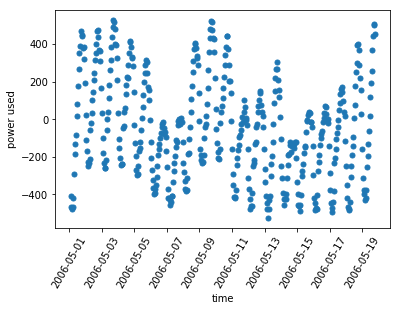

In [14]:
max_ct = 18*25
plt.plot_date(x=df_spring_detrended['Hour_End'][0:max_ct],
              y=df_spring_detrended['EAST power detrended'][0:max_ct],markersize=5);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

# optional challenge 2: remove weekly oscillations

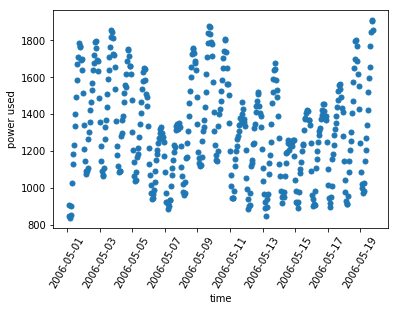

In [15]:
max_ct = 18*25
plt.plot_date(x=df_spring['Hour_End'][0:max_ct],y=df_spring['EAST'][0:max_ct],markersize=5);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

# temporal decomposition

In [16]:
df_2006 = df[df['Hour_End'].apply(lambda x: x.year==2006)]

## smoothing out noise using rolling average

<img src="https://cdn.ablebits.com/_img-blog/moving-average/moving-average.png"><BR>
<a href="https://www.ablebits.com/office-addins-blog/2015/09/25/moving-average-excel/">source</a>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

By default, the result is set to the right edge of the window.

In [17]:
df['EAST'].rolling(window=5).mean().head(15)

0             NaN
1             NaN
2             NaN
3             NaN
4      776.558484
5      775.426883
6      782.572365
7      793.149122
8      806.756460
9      829.287177
10     860.090533
11     896.347190
12     933.249232
13     975.813876
14    1008.704671
Name: EAST, dtype: float64

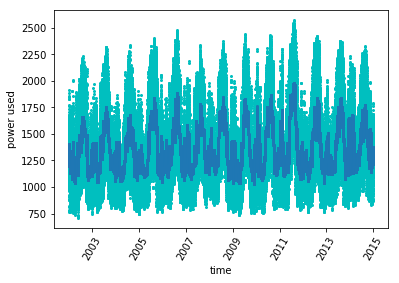

In [18]:
# window size of one week (7 days and 24 hours)
plt.plot_date(x=df['Hour_End'],y=df['EAST'],markersize=2, color='c');
plt.plot_date(x=df['Hour_End'],y=df['EAST'].rolling(window=7*24).mean(),markersize=2);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

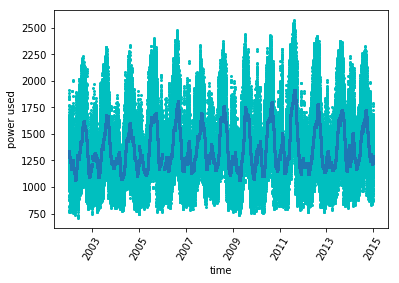

In [19]:
# window size of one month (30 days and 24 hours)
plt.plot_date(x=df['Hour_End'],y=df['EAST'],markersize=2, color='c');
plt.plot_date(x=df['Hour_End'],y=df['EAST'].rolling(window=30*24).mean(),markersize=2);
plt.xticks(rotation=60);
plt.xlabel('time');
plt.ylabel('power used');

When you complete this notebook, return to the main room in Blackboard Collaborate

<BR>

<img src="https://i.imgur.com/lb2HlD9.png">